<a href="https://colab.research.google.com/github/sherlocksai/treespecies-week2/blob/main/tree_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/sherlocksai/treespecies-week2


Cloning into 'treespecies-week2'...
remote: Enumerating objects: 1566, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 1566 (delta 5), reused 4 (delta 2), pack-reused 1552 (from 2)
Receiving objects: 100% (1566/1566), 74.62 MiB | 25.55 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [7]:
import os

repo_path = "treespecies-week2/Tree_Species_Dataset"  # Adjust if cloned to a different name
print("Contents:", os.listdir(repo_path))

Contents: ['gulmohor', 'cactus', 'kanchan', 'coconut', 'banyan', 'vad', 'gunda', 'motichanoti', 'garmalo', 'sitafal', 'sonmahor', 'simlo', 'nilgiri', 'neem', 'other', 'khajur', 'kesudo', 'sugarcane', 'shirish', 'pipal', 'mango', 'jamun', 'amla', 'babul', 'saptaparni', 'pilikaren', 'asopalav', 'bamboo', 'bili', 'champa']


In [8]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")


Number of classes: 30


In [9]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")


Total images: 1600


In [10]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ", class_counts_df.shape)


          Image Count
other             150
gulmohor           50
kanchan            50
coconut            50
banyan             50
shape:  (30, 1)


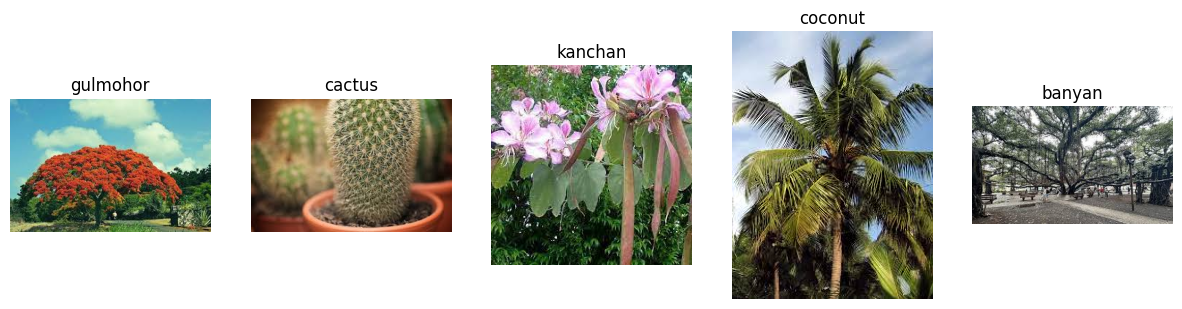

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)


In [12]:
image_shapes = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        img = Image.open(img_path)
        image_shapes.append(img.size)

# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

,Width,Height
0,275,183
1,271,186
2,275,183
3,306,165
4,225,225


In [13]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [14]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 82


In [15]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


Duplicate set 1:


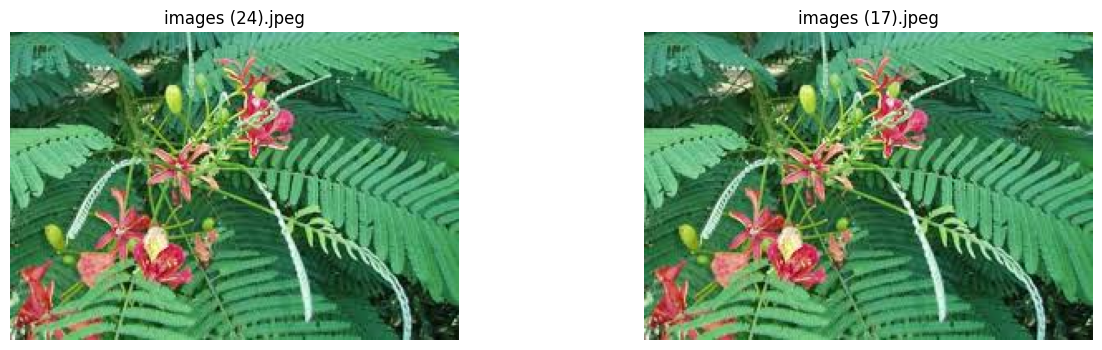

Duplicate set 2:


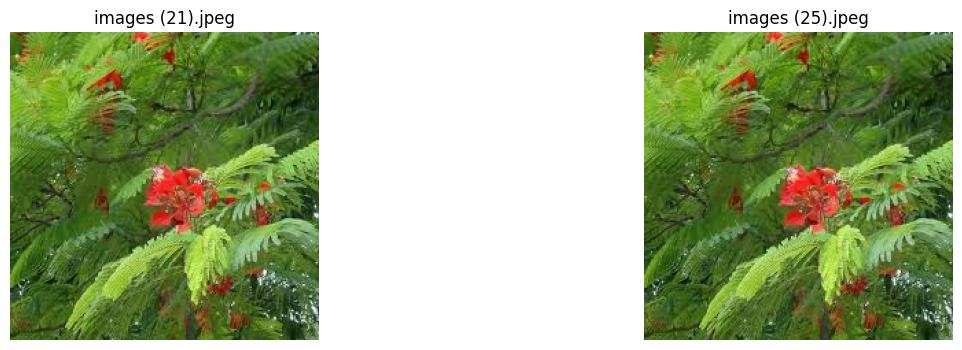

Duplicate set 3:


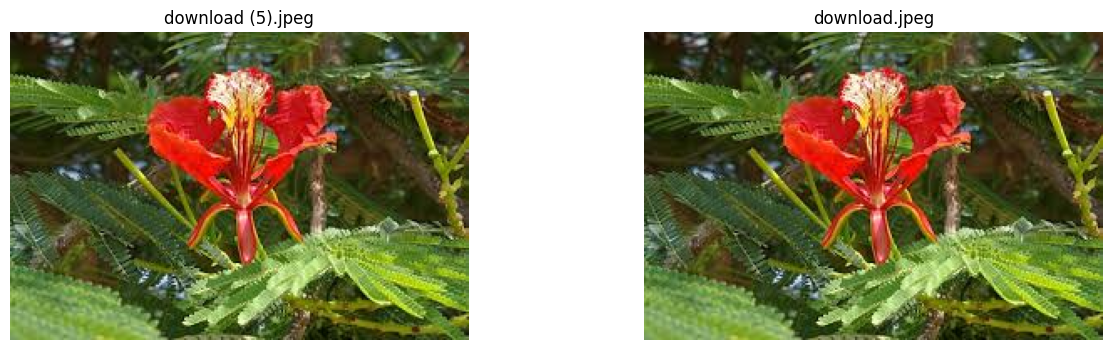

In [16]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [17]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [18]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [19]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


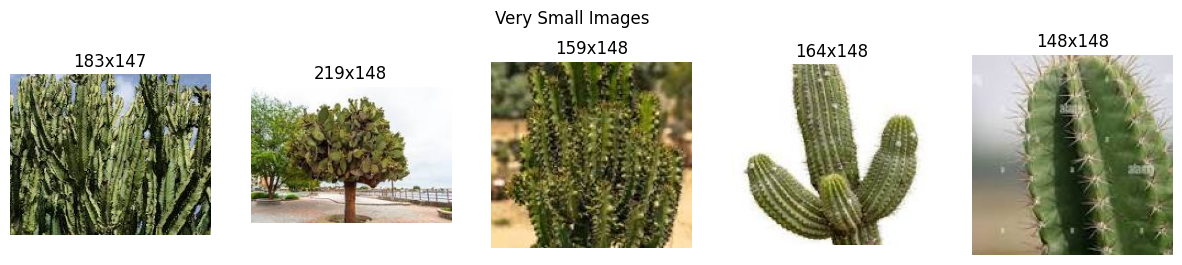

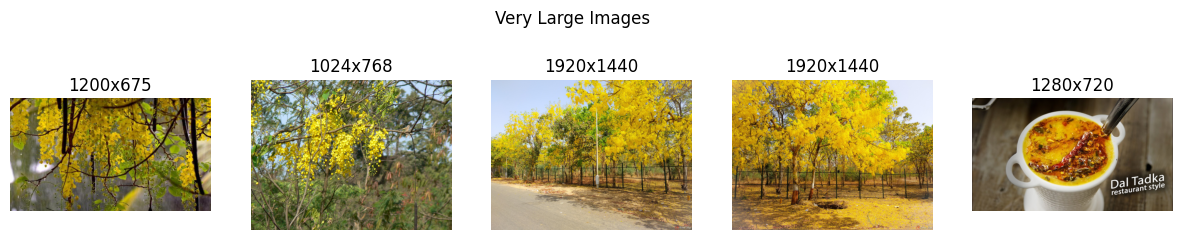

In [20]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [21]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [22]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [26]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')

# Unfreeze some layers
for layer in base_model.layers[-20:]:
    layer.trainable = True

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         7,710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385,217 (16.73 MB)

 Trainable params: 4,343,194 (16.57 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [27]:
EPOCHS = 50

# Add a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[lr_scheduler]
)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.0312 - loss: 3.5974 - val_accuracy: 0.0289 - val_loss: 3.4216 - learning_rate: 1.0000e-04
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 472ms/step - accuracy: 0.0535 - loss: 3.3961 - val_accuracy: 0.0289 - val_loss: 3.4084 - learning_rate: 1.0000e-04
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 512ms/step - accuracy: 0.1115 - loss: 3.2028 - val_accuracy: 0.0361 - val_loss: 3.4034 - learning_rate: 1.0000e-04
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 470ms/step - accuracy: 0.1723 - loss: 2.9871 - val_accuracy: 0.0397 - val_loss: 3.4025 - learning_rate: 1.0000e-04
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 472ms/step - accuracy: 0.2253 - loss: 2.8241 - val_accuracy: 0.0253 - val_loss: 3.4059 - learning_rate: 1.0000e-04
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 505ms/step - accuracy: 0.3005 - loss: 2.5518 - val_accuracy: 0.0325 - val_loss: 3.4029 - learning_rate: 1.0000e-04
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 471ms/step - accur

KeyboardInterrupt: 

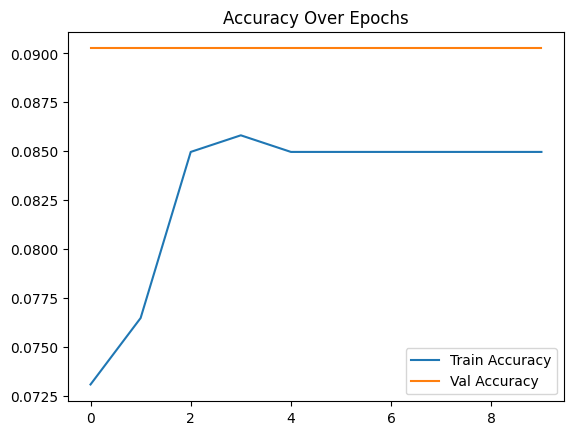

In [28]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 36s 783ms/step - accuracy: 0.0746 - loss: 3.9415 - val_accuracy: 0.1119 - val_loss: 3.1883
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 459ms/step - accuracy: 0.1060 - loss: 3.2402 - val_accuracy: 0.1444 - val_loss: 3.0445
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 441ms/step - accuracy: 0.1263 - loss: 3.1141 - val_accuracy: 0.1625 - val_loss: 2.9772
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 644ms/step - accuracy: 0.1464 - loss: 3.0508 - val_accuracy: 0.1733 - val_loss: 2.8816
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 444ms/step - accuracy: 0.1895 - loss: 2.9066 - val_accuracy: 0.2310 - val_loss: 2.8374
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 481ms/step - accuracy: 0.1849 - loss: 2.8751 - val_accuracy: 0.1769 - val_loss: 2.9151
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 443ms/step - accuracy: 0.2004 - loss: 2.8656 - val_accuracy: 0.2202 - val_loss: 2.7707
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 443ms/step - accuracy: 0.1806 - loss: 2.8331 - val_accu

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


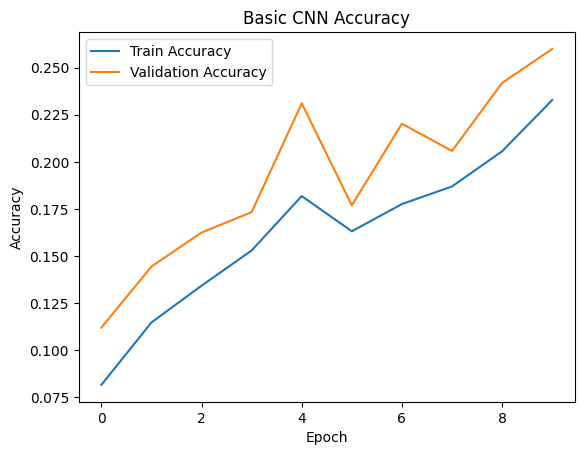

In [30]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # For 30 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=20)

model.save("improved_cnn_model.h5")

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 561ms/step - accuracy: 0.0857 - loss: 5.5653 - val_accuracy: 0.0289 - val_loss: 7.1629
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - accuracy: 0.1164 - loss: 3.2334 - val_accuracy: 0.1119 - val_loss: 13.0816
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 481ms/step - accuracy: 0.1122 - loss: 3.2746 - val_accuracy: 0.0903 - val_loss: 17.4250
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 446ms/step - accuracy: 0.1339 - loss: 3.1599 - val_accuracy: 0.0903 - val_loss: 18.5429
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 480ms/step - accuracy: 0.1283 - loss: 3.1619 - val_accuracy: 0.0903 - val_loss: 19.9414
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 446ms/step - accuracy: 0.1307 - loss: 3.0772 - val_accuracy: 0.0903 - val_loss: 23.4319
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 508ms/step - accuracy: 0.1547 - loss: 3.0776 - val_accuracy: 0.0903 - val_loss: 21.2531
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - accuracy: 0.1517 - loss: 3.0382 - va